In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from datetime import datetime

In [4]:
covid_df = pd.read_csv('covid_19_india.csv')
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/2020,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       801 non-null    int64 
 1   Date                      801 non-null    object
 2   Time                      801 non-null    object
 3   State/UnionTerritory      801 non-null    object
 4   ConfirmedIndianNational   801 non-null    object
 5   ConfirmedForeignNational  801 non-null    object
 6   Cured                     801 non-null    int64 
 7   Deaths                    801 non-null    int64 
 8   Confirmed                 801 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 56.4+ KB


In [6]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,801.000000,801.000000,801.000000,801.000000
mean,401.000000,4.144819,1.334582,53.786517
std,231.373075,10.236284,4.758720,118.296748
min,1.000000,0.000000,0.000000,1.000000
25%,201.000000,0.000000,0.000000,3.000000
50%,401.000000,0.000000,0.000000,10.000000
75%,601.000000,3.000000,1.000000,41.000000
max,801.000000,117.000000,72.000000,1135.000000


In [8]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,17/04/2021,West Bengal,7577053.0,366910.0,1943.0,7577053.0,1162663.0,4060679.0,3515521.0,853.0,953764.0,7785952.0,7577053.0,8739716
3548,18/04/2021,West Bengal,7593056.0,489171.0,2889.0,7593056.0,1171094.0,4069772.0,3522428.0,856.0,960216.0,7803934.0,7593056.0,8764150
3549,19/04/2021,West Bengal,7701111.0,604585.0,3414.0,7701111.0,1275030.0,4128110.0,3572137.0,864.0,986681.0,7989460.0,7701111.0,8976141
3550,20/04/2021,West Bengal,7830594.0,490740.0,2747.0,7830594.0,1379100.0,4198697.0,3631015.0,882.0,1007847.0,8201847.0,7830594.0,9209694


In [10]:
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace = True, axis = 1)
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/2020,Kerala,0,0,1
1,31/01/2020,Kerala,0,0,1
2,01/02/2020,Kerala,0,0,2
3,02/02/2020,Kerala,0,0,3
4,03/02/2020,Kerala,0,0,3
...,...,...,...,...,...
796,09/04/2020,Telengana,35,7,442
797,09/04/2020,Tripura,0,0,1
798,09/04/2020,Uttarakhand,5,0,35
799,09/04/2020,Uttar Pradesh,31,4,410


In [13]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%d/%m/%Y')
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
796,2020-04-09,Telengana,35,7,442
797,2020-04-09,Tripura,0,0,1
798,2020-04-09,Uttarakhand,5,0,35
799,2020-04-09,Uttar Pradesh,31,4,410


In [14]:
covid_df['Active Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] - covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
796,2020-04-09,Telengana,35,7,442,414
797,2020-04-09,Tripura,0,0,1,1
798,2020-04-09,Uttarakhand,5,0,35,30
799,2020-04-09,Uttar Pradesh,31,4,410,383
800,2020-04-09,West Bengal,16,5,103,92


In [16]:
statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Deaths', 'Cured'],
                          index = 'State/UnionTerritory', aggfunc = max)
statewise['Recovery rate'] = statewise['Cured']*100/statewise['Confirmed']

In [17]:
statewise['Mortality rate'] = statewise['Deaths']*100/statewise['Confirmed']

In [18]:
statewise = statewise.sort_values(by = 'Confirmed', ascending = False)

In [19]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,Recovery rate,Mortality rate
State/UnionTerritory,,,,,
Maharashtra,1135,117,72,10.308370,6.343612
Tamil Nadu,738,21,8,2.845528,1.084011
Delhi,669,21,9,3.139013,1.345291
Telengana,442,35,7,7.918552,1.583710
Uttar Pradesh,410,31,4,7.560976,0.975610
Rajasthan,383,21,3,5.483029,0.783290
Andhra Pradesh,348,6,4,1.724138,1.149425
Kerala,345,83,2,24.057971,0.579710
Madhya Pradesh,259,0,16,0.000000,6.177606


In [26]:
top_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active Cases']].sort_values(by = ['Active Cases'], ascending = False).reset_index()  
top_10_active_cases = top_active_cases.head(10)
top_10_active_cases

,State/UnionTerritory,Active Cases
0,Maharashtra,1090
1,Tamil Nadu,725
2,Delhi,657
3,Telengana,414
4,Uttar Pradesh,383
5,Rajasthan,365
6,Andhra Pradesh,346
7,Madhya Pradesh,275
8,Kerala,271
9,Gujarat,170


Text(0.5, 1.0, 'Top 10 states with most active cases in India')

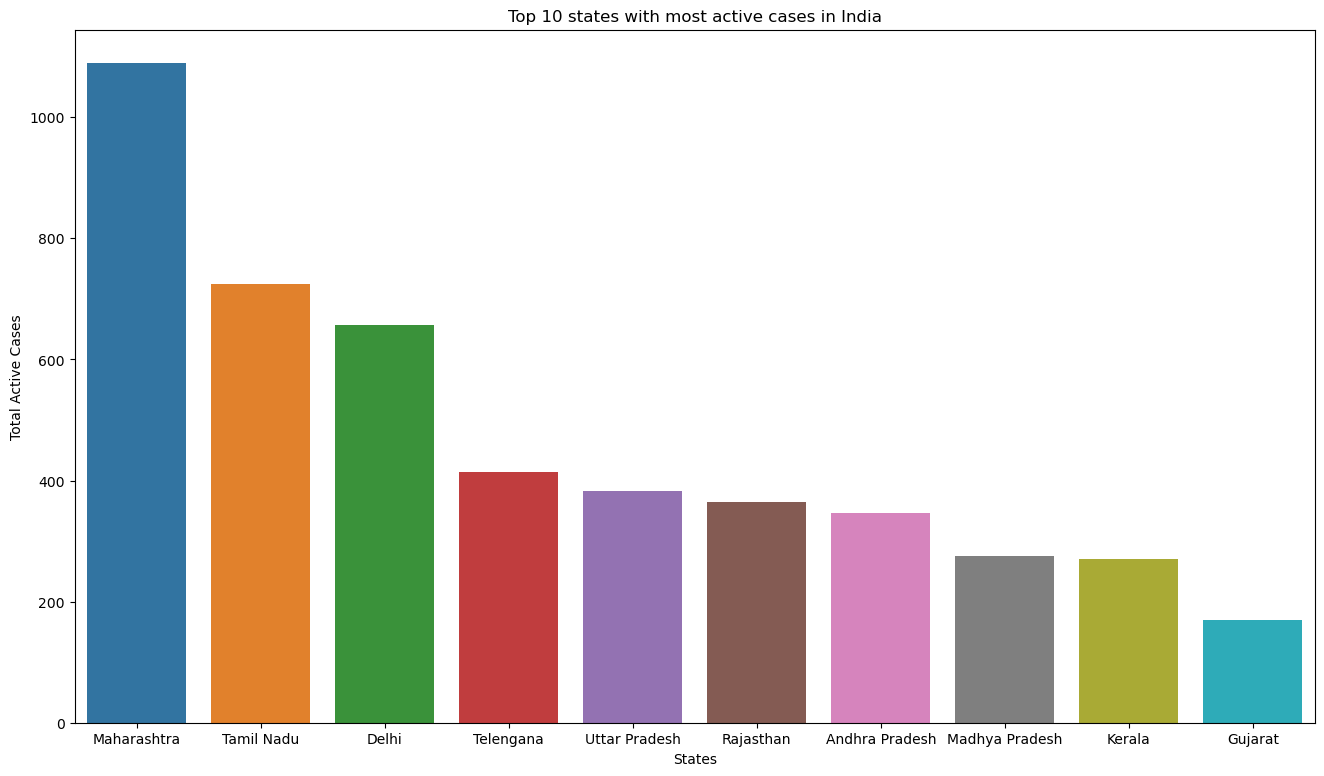

In [49]:
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_10_active_cases, y = 'Active Cases', x = 'State/UnionTerritory')
plt.xlabel('States')
plt.ylabel('Total Active Cases')
plt.title('Top 10 states with most active cases in India')

In [50]:
top_death_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths']].sort_values(by = ['Deaths'], ascending = False).reset_index()  
top_10_death_cases = top_death_cases.head(10)
top_10_death_cases

,State/UnionTerritory,Deaths
0,Maharashtra,72
1,Madhya Pradesh,16
2,Gujarat,16
3,Delhi,9
4,Punjab,8
5,Tamil Nadu,8
6,Telengana,7
7,West Bengal,5
8,Karnataka,5
9,Uttar Pradesh,4


Text(0.5, 1.0, 'Top 10 states with most death cases in India')

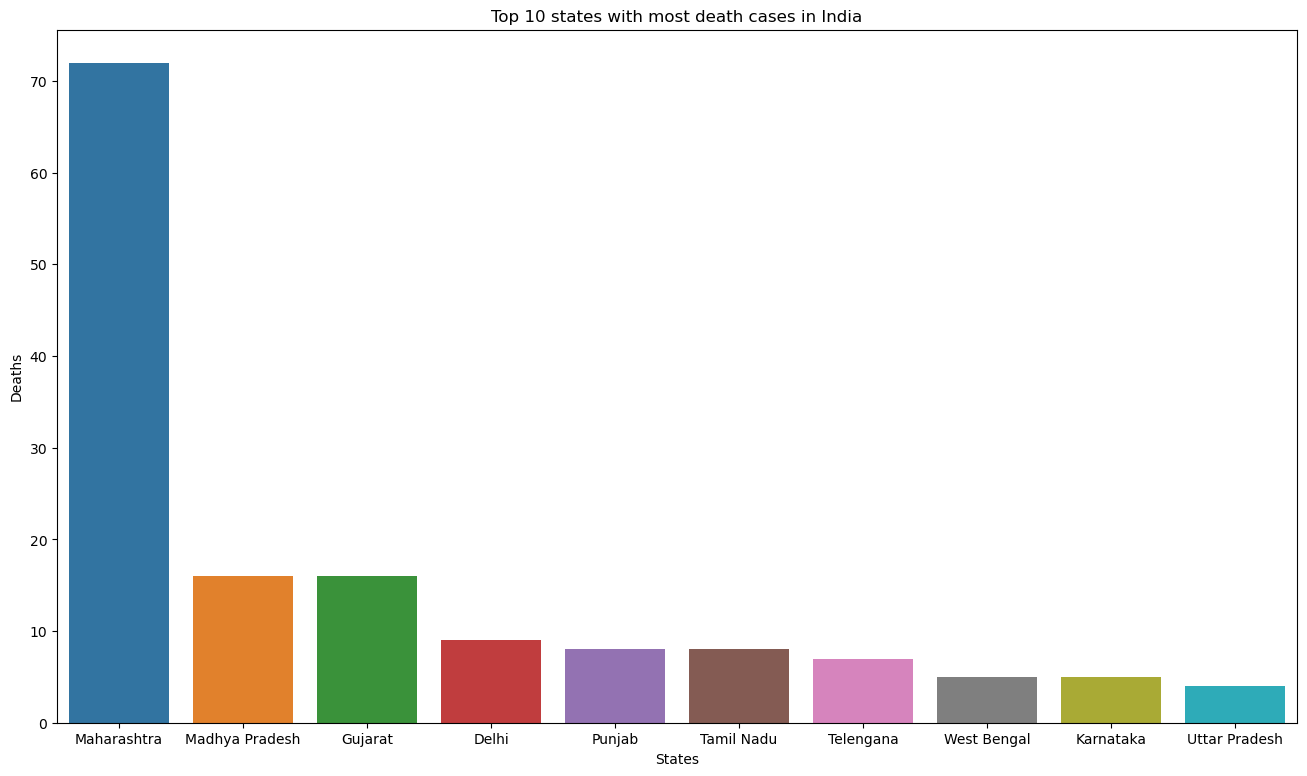

In [51]:
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_10_death_cases, y = 'Deaths', x = 'State/UnionTerritory')
plt.xlabel('States')
plt.ylabel('Deaths')
plt.title('Top 10 states with most death cases in India')

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin([''])])

In [72]:
x = covid_df[['State/UnionTerritory', 'Deaths', 'Date']]
x = x.sort_values(by = ['Deaths'], ascending = False)

grouped_data = x.groupby(['State/UnionTerritory', 'Date'])['Deaths'].sum().reset_index()
top_5_states = grouped_data.groupby('State/UnionTerritory')['Deaths'].sum().nlargest(5).index
top_5_states_data = x[x['State/UnionTerritory'].isin(top_5_states)]

print(top_5_states_data)


    State/UnionTerritory  Deaths       Date
788          Maharashtra      72 2020-04-09
757          Maharashtra      64 2020-04-08
726          Maharashtra      48 2020-04-07
696          Maharashtra      45 2020-04-06
636          Maharashtra      24 2020-04-04
..                   ...     ...        ...
231              Gujarat       0 2020-03-20
200               Punjab       0 2020-03-18
279       Madhya Pradesh       0 2020-03-22
251              Gujarat       0 2020-03-21
256       Madhya Pradesh       0 2020-03-21

[144 rows x 3 columns]


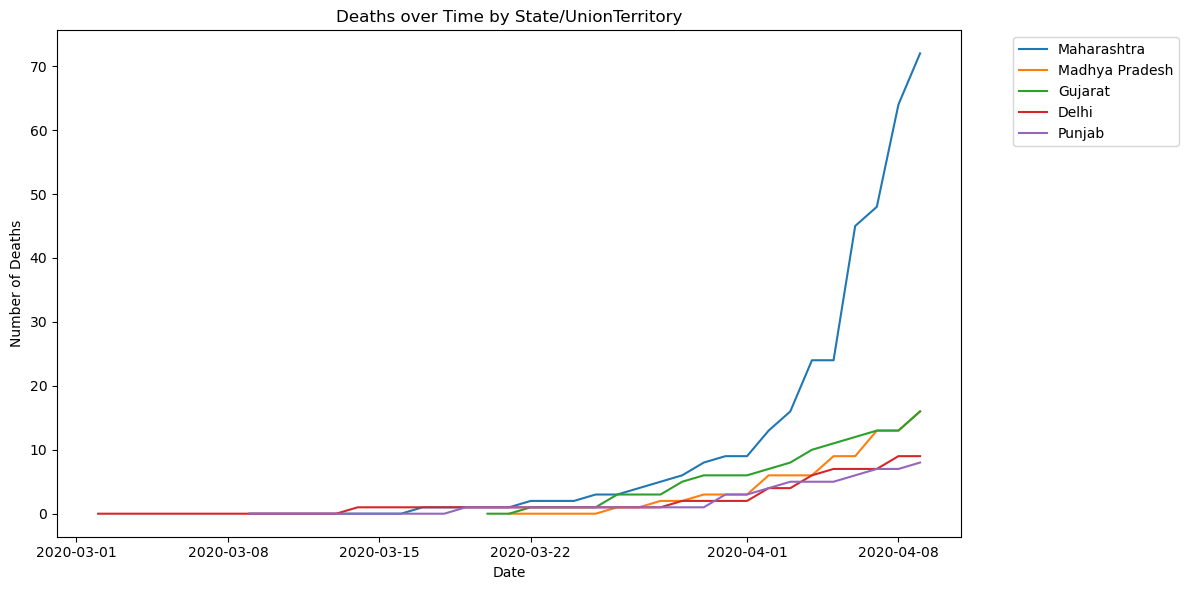

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths', hue='State/UnionTerritory', data=top_5_states_data)
plt.title('Deaths over Time by State/UnionTerritory')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()


In [74]:
vaccine_df

,Updated On,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0,251280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,17/04/2021,West Bengal,7577053.0,366910.0,1943.0,7577053.0,1162663.0,4060679.0,3515521.0,853.0,953764.0,7785952.0,7577053.0,8739716
3548,18/04/2021,West Bengal,7593056.0,489171.0,2889.0,7593056.0,1171094.0,4069772.0,3522428.0,856.0,960216.0,7803934.0,7593056.0,8764150
3549,19/04/2021,West Bengal,7701111.0,604585.0,3414.0,7701111.0,1275030.0,4128110.0,3572137.0,864.0,986681.0,7989460.0,7701111.0,8976141
3550,20/04/2021,West Bengal,7830594.0,490740.0,2747.0,7830594.0,1379100.0,4198697.0,3631015.0,882.0,1007847.0,8201847.0,7830594.0,9209694


In [94]:
vaccine_df.rename(columns = {'Updated On' : 'Vaccine Date'},inplace = True)
vaccine_df.head()

,Vaccine Date,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
0,16/01/2021,India,6943622.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0,48276
1,17/01/2021,India,7119567.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0,58604
2,18/01/2021,India,7150780.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0,99449
3,19/01/2021,India,7423057.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0,195525
4,20/01/2021,India,7555207.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0,251280


In [76]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine Date                         3552 non-null   object 
 1   State                                3552 non-null   object 
 2   Total Individuals Registered         3544 non-null   float64
 3   Total Sessions Conducted             3545 non-null   float64
 4   Total Sites                          3545 non-null   float64
 5   First Dose Administered              3545 non-null   float64
 6   Second Dose Administered             3545 non-null   float64
 7   Male(Individuals Vaccinated)         3545 non-null   float64
 8   Female(Individuals Vaccinated)       3545 non-null   float64
 9   Transgender(Individuals Vaccinated)  3545 non-null   float64
 10  Total Covaxin Administered           3545 non-null   float64
 11  Total CoviShield Administered 

In [77]:
vaccine_df.isnull().sum()

Vaccine Date                           0
State                                  0
Total Individuals Registered           8
Total Sessions Conducted               7
Total Sites                            7
First Dose Administered                7
Second Dose Administered               7
Male(Individuals Vaccinated)           7
Female(Individuals Vaccinated)         7
Transgender(Individuals Vaccinated)    7
Total Covaxin Administered             7
Total CoviShield Administered          7
Total Individuals Vaccinated           7
Total Doses Administered               0
dtype: int64

In [80]:
female = vaccine_df['Female(Individuals Vaccinated)'].sum()
male = vaccine_df['Male(Individuals Vaccinated)'].sum()
male

3072022958.0

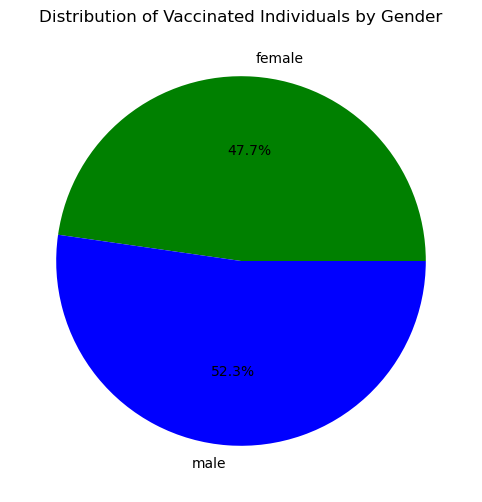

In [90]:
labels = ['female', 'male']
sizes = [female, male]
colors = ['green', 'blue']

fig = plt.figure(figsize = (12,6))
plt.pie(sizes, labels = labels, colors=colors, autopct = '%1.1f%%')
plt.title('Distribution of Vaccinated Individuals by Gender')
plt.show()

In [93]:
vaccine_df_2 = vaccine_df[vaccine_df.State != 'India']
vaccine_df_2.head()

,Vaccine Date,State,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
96,16/01/2021,Andaman and Nicobar Islands,6028.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0,23
97,17/01/2021,Andaman and Nicobar Islands,6028.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,23.0,23
98,18/01/2021,Andaman and Nicobar Islands,5719.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,42.0,42
99,19/01/2021,Andaman and Nicobar Islands,6731.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,89.0,89
100,20/01/2021,Andaman and Nicobar Islands,6870.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,124.0,124


In [96]:
vaccine_df_2.describe()

,Total Individuals Registered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated,Total Doses Administered
count,3.448000e+03,3.449000e+03,3449.000000,3.449000e+03,3.449000e+03,3.449000e+03,3.449000e+03,3449.000000,3.449000e+03,3.449000e+03,3.449000e+03,3.456000e+03
mean,1.009661e+06,6.783067e+04,1589.052479,8.516409e+05,1.343333e+05,4.451050e+05,4.064385e+05,97.442737,8.086120e+04,8.385845e+05,8.516409e+05,9.839772e+05
std,1.688455e+06,1.667044e+05,2275.066941,1.673442e+06,2.536739e+05,8.818574e+05,7.960401e+05,199.517523,1.863370e+05,1.707637e+06,1.673442e+06,1.916746e+06
min,7.420000e+02,1.000000e+00,1.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,7.000000e+00,0.000000e+00
25%,7.321625e+04,1.028000e+03,112.000000,2.147800e+04,0.000000e+00,1.000400e+04,9.942000e+03,0.000000,0.000000e+00,2.157400e+04,2.147800e+04,2.367325e+04
50%,3.523920e+05,6.741000e+03,591.000000,1.335710e+05,1.183100e+04,6.562900e+04,6.285900e+04,8.000000,1.920000e+02,1.450210e+05,1.335710e+05,1.524755e+05
75%,1.073498e+06,3.963800e+04,2111.000000,7.735210e+05,1.549830e+05,4.230780e+05,3.595860e+05,99.000000,6.256100e+04,6.996490e+05,7.735210e+05,9.184432e+05
max,1.169183e+07,1.239796e+06,14861.000000,1.169183e+07,1.809439e+06,6.306172e+06,5.384230e+06,1427.000000,1.457704e+06,1.182168e+07,1.169183e+07,1.327939e+07


In [99]:
max_vaccine = vaccine_df_2.groupby('State')['Total Individuals Vaccinated'].sum()
top_5_max_vaccine_state = max_vaccine.sort_values(ascending = False).head()
top_5_max_vaccine_state

State
Maharashtra      283272811.0
Rajasthan        275458862.0
Uttar Pradesh    268572687.0
Gujarat          262142291.0
West Bengal      234596452.0
Name: Total Individuals Vaccinated, dtype: float64

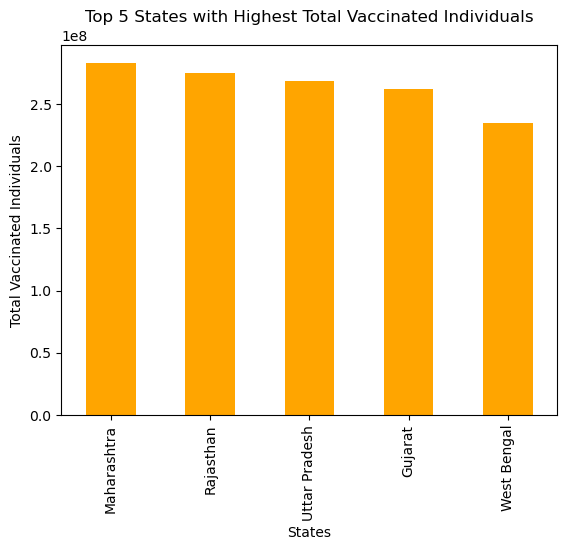

In [113]:
top_5_max_vaccine_state.plot(kind = 'bar', color = 'orange')
plt.title('Top 5 States with Highest Total Vaccinated Individuals')
plt.xlabel('States')
plt.ylabel('Total Vaccinated Individuals')
plt.show()

In [124]:
max_vaccine = vaccine_df_2.groupby('State')['Total Individuals Vaccinated'].sum()
last_5_min_vaccine_state = max_vaccine.sort_values(ascending = False).tail()
last_5_min_vaccine_state

State
Puducherry                                  3441845.0
Ladakh                                      2348643.0
Dadra and Nagar Haveli and Daman and Diu    1409718.0
Andaman and Nicobar Islands                 1346603.0
Lakshadweep                                  361801.0
Name: Total Individuals Vaccinated, dtype: float64

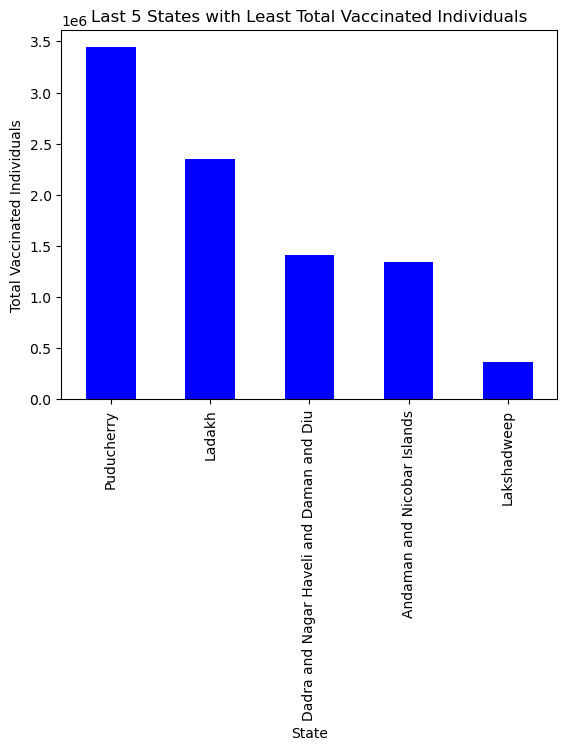

In [125]:
last_5_min_vaccine_state.plot(kind = 'bar', color = 'blue')
plt.title('Last 5 States with Least Total Vaccinated Individuals')
plt.xlabel('State')
plt.ylabel('Total Vaccinated Individuals')
plt.show()

In [126]:
max_state_reg = vaccine_df_2.groupby('State')['Total Individuals Registered'].sum()
max_state_reg = max_state_reg.sort_values(ascending = False).head()
max_state_reg

State
Maharashtra      349001016.0
Uttar Pradesh    312175892.0
West Bengal      302748771.0
Rajasthan        294310119.0
Gujarat          280845315.0
Name: Total Individuals Registered, dtype: float64

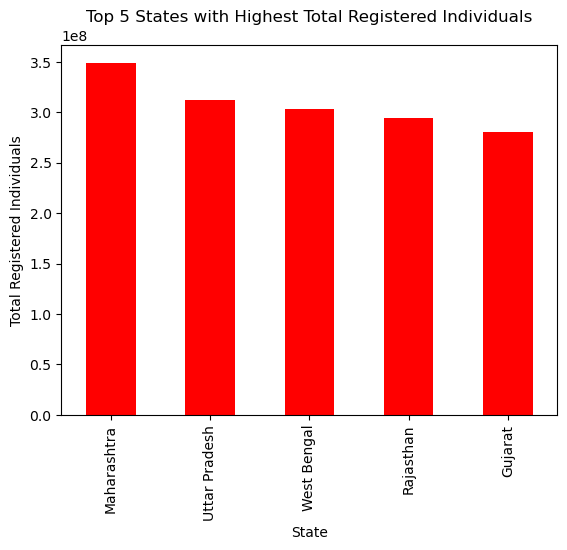

In [129]:
max_state_reg.plot(kind = 'bar', color = 'red')
plt.xlabel('State')
plt.ylabel('Total Registered Individuals')
plt.title('Top 5 States with Highest Total Registered Individuals')
plt.show()